In [ ]:
#Importing all the necessary Libraries
import numpy as np 
import pandas as pd 
import pywt
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

import keras
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.callbacks import History


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Attach the path to your dataset.
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/eardataset.csv')
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/eardataset.csv', encoding = "ISO-8859-1")

In [ ]:
df_again = pd.read_csv('/content/drive/My Drive/Colab Notebooks/eardataset.csv')
df_again.head(3)

,unnamed,subject,session,ear,buffer,block,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20,data_21,data_22,data_23,data_24,data_25,data_26,data_27,data_28,data_29,data_30,data_31,data_32,data_33,...,data_620,data_621,data_622,data_623,data_624,data_625,data_626,data_627,data_628,data_629,data_630,data_631,data_632,data_633,data_634,data_635,data_636,data_637,data_638,data_639,data_640,data_641,data_642,data_643,data_644,data_645,data_646,data_647,data_648,data_649,data_650,data_651,data_652,data_653,data_654,data_655,data_656,data_657,data_658,data_659
0,40,0,0,left,A,40,0.000062,0.000063,0.000064,0.000067,0.000069,0.000072,0.000074,0.000077,0.000078,0.000080,0.000081,0.000083,0.000084,0.000085,0.000085,0.000085,0.000085,0.000085,0.000084,0.000083,0.000082,0.000081,0.000081,0.000081,0.000080,0.000080,0.000080,0.000081,0.000081,0.000082,0.000083,0.000084,0.000084,0.000085,...,-0.000063,-0.000063,-0.000064,-0.000063,-0.000063,-0.000062,-0.000061,-0.000061,-0.000060,-0.000059,-0.000057,-0.000056,-0.000056,-0.000054,-0.000052,-0.000051,-0.000050,-0.000049,-0.000047,-0.000046,-0.000044,-0.000043,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000043,-0.000044,-0.000045,-0.000046,-0.000048,-0.000049,-0.000051,-0.000052,-0.000052,-0.000053,-0.000053,-0.000052,-0.000051
1,41,0,0,left,A,41,0.000063,0.000064,0.000065,0.000067,0.000070,0.000072,0.000075,0.000077,0.000079,0.000080,0.000081,0.000083,0.000084,0.000085,0.000085,0.000085,0.000085,0.000084,0.000083,0.000082,0.000082,0.000081,0.000081,0.000081,0.000080,0.000079,0.000079,0.000080,0.000081,0.000081,0.000083,0.000083,0.000084,0.000084,...,-0.000055,-0.000055,-0.000055,-0.000055,-0.000054,-0.000053,-0.000052,-0.000052,-0.000052,-0.000050,-0.000049,-0.000048,-0.000047,-0.000045,-0.000044,-0.000042,-0.000041,-0.000040,-0.000039,-0.000038,-0.000036,-0.000035,-0.000034,-0.000034,-0.000034,-0.000034,-0.000035,-0.000036,-0.000036,-0.000037,-0.000039,-0.000040,-0.000042,-0.000043,-0.000044,-0.000044,-0.000044,-0.000044,-0.000044,-0.000042
2,42,0,0,left,A,42,0.000065,0.000066,0.000067,0.000069,0.000071,0.000074,0.000077,0.000079,0.000081,0.000082,0.000083,0.000085,0.000086,0.000087,0.000087,0.000087,0.000087,0.000086,0.000086,0.000084,0.000084,0.000083,0.000083,0.000082,0.000081,0.000081,0.000081,0.000082,0.000083,0.000083,0.000084,0.000085,0.000086,0.000086,...,-0.000059,-0.000059,-0.000059,-0.000058,-0.000057,-0.000057,-0.000056,-0.000056,-0.000056,-0.000054,-0.000052,-0.000051,-0.000051,-0.000049,-0.000047,-0.000046,-0.000045,-0.000044,-0.000042,-0.000041,-0.000040,-0.000039,-0.000038,-0.000037,-0.000037,-0.000037,-0.000038,-0.000039,-0.000039,-0.000040,-0.000042,-0.000043,-0.000045,-0.000046,-0.000047,-0.000047,-0.000047,-0.000047,-0.000047,-0.000045


In [ ]:
df_again=df_again.drop(["unnamed", "session","ear","buffer","block"],axis=1)

In [ ]:
def subject0(subjectno, sessionno, earname, bufferid):
    dfu0=df.groupby(['subject', 'session', 'ear', 'buffer']).get_group((subjectno, sessionno, earname, bufferid)).iloc[-10:]
    return dfu0

x=subject0(34,0,'left','B')
x['subject'].iloc[0]
print(x.shape)
print(x)

(10, 666)
      unnamed  subject  session   ear  ...  data_656  data_657  data_658  data_659
2730    30662       34        0  left  ...  0.000009  0.000009  0.000009  0.000009
2731    30663       34        0  left  ...  0.000010  0.000010  0.000010  0.000010
2732    30664       34        0  left  ...  0.000010  0.000010  0.000010  0.000010
2733    30665       34        0  left  ...  0.000010  0.000010  0.000010  0.000010
2734    30666       34        0  left  ...  0.000010  0.000010  0.000010  0.000010
2735    30667       34        0  left  ...  0.000010  0.000010  0.000010  0.000010
2736    30668       34        0  left  ...  0.000010  0.000010  0.000010  0.000010
2737    30669       34        0  left  ...  0.000010  0.000010  0.000010  0.000010
2738    30670       34        0  left  ...  0.000009  0.000008  0.000008  0.000008
2739    30671       34        0  left  ...  0.000009  0.000008  0.000008  0.000008

[10 rows x 666 columns]


In [ ]:

#Creating Input and Labels DataFrame

allInputTEOAEsignalsAllSubjects = pd.DataFrame([])
allOutputLabelsAllSubjects = pd.DataFrame([])
for a in range(54):
    print(a)
    df1 = pd.DataFrame([])
    b=[0]              # sessions 0 and 1
    c=['left']   # ears 
    #d=['A','B']          # buffers
    d=['A']
    allFeatures =  pd.DataFrame([])
    allInputFeatures =  pd.DataFrame([])
    outputLabel =  pd.DataFrame([])
    fftValues =  pd.DataFrame([])
    psdValues =  pd.DataFrame([])
    autocorrValues = pd.DataFrame([])
        
    for q,r,s in [(q,r,s) for q in b for r in c for s in d]:
        
        # df1 contains all the 80 TEOAE signals of subject a
        df1 = df1.append(subject0(a,q,r,s))
        allInputFeatures = df1.iloc[:,6:]
    
    allInputTEOAEsignalsAllSubjects = pd.concat([allInputTEOAEsignalsAllSubjects.reset_index(drop=True),
                                                 allInputFeatures.reset_index(drop=True)], axis=0)
    # the following gets you the class label <= subject no.[0,1,2,...,53]
    outputLabel = df1.iloc[:,1] 
    print("OutputLabel:",outputLabel)
    #allOutputLabelsAllSubjects = allOutputLabelsAllSubjects.append(outputLabel)
    #append didn't work for output so using pd.cat instead
    allOutputLabelsAllSubjects = pd.concat([allOutputLabelsAllSubjects.reset_index(drop=True),
                                            outputLabel.reset_index(drop=True)], axis=0)
    print(allInputTEOAEsignalsAllSubjects.shape)
    print(allOutputLabelsAllSubjects.shape)

0
OutputLabel: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: subject, dtype: int64
(10, 660)
(10, 1)
1
OutputLabel: 80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
Name: subject, dtype: int64
(20, 660)
(20, 1)
2
OutputLabel: 160    2
161    2
162    2
163    2
164    2
165    2
166    2
167    2
168    2
169    2
Name: subject, dtype: int64
(30, 660)
(30, 1)
3
OutputLabel: 240    3
241    3
242    3
243    3
244    3
245    3
246    3
247    3
248    3
249    3
Name: subject, dtype: int64
(40, 660)
(40, 1)
4
OutputLabel: 320    4
321    4
322    4
323    4
324    4
325    4
326    4
327    4
328    4
329    4
Name: subject, dtype: int64
(50, 660)
(50, 1)
5
OutputLabel: 400    5
401    5
402    5
403    5
404    5
405    5
406    5
407    5
408    5
409    5
Name: subject, dtype: int64
(60, 660)
(60, 1)
6
OutputLabel: 480    6
481    6
482    6
483    6
484    6
485    6
486    6
487    6
488    6
489    6
Name: subject, dtyp

In [ ]:
# save extracted dataframe locally
X=pd.DataFrame([])
y=pd.DataFrame([])
xsave = pd.DataFrame([])
ysave = pd.DataFrame([])
X = allInputTEOAEsignalsAllSubjects
y = allOutputLabelsAllSubjects
xsave = X
ysave = y
#xsave.to_pickle('dataX.pkl')
#ysave.to_pickle('labelY.pkl')

In [ ]:
#Splitting 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
#Checking the dimensions of train and test array
print(np.asarray(X_train).shape)
print(np.asarray(X_test).shape)
print(np.asarray(y_train).shape)
print(np.asarray(y_test).shape)
labels_train = list(map(lambda x: int(x), np.asarray(y_train)))
print(np.asarray(labels_train).shape)

(432, 660)
(108, 660)
(432, 1)
(108, 1)
(432,)


In [ ]:
scales = range(1,51)
waveletname = 'morl'
train_size = X_train.shape[0]
test_size= X_test.shape[0]

#########################################################
### creating a tensor to store CWT matrices of train egs#
#########################################################
train_data_cwt = np.ndarray(shape=(train_size, 50, 660)) 

for ii in range(0,train_size):
    if ii % 50 == 0: #len(X_train) == 0:
        print(ii)
    signal = X_train.iloc[ii, :]
    coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
    coeff_ = coeff[:,:660]
    train_data_cwt[ii, :, :] = coeff_
    #train_data_cwt[:, :, ii] = coeff_

###########################################################
### creating a tensor to store CWT matrices of test egs ###
###########################################################
test_data_cwt = np.ndarray(shape=(test_size, 50, 660))

for ii in range(0,test_size):
    if ii % 50 == 0:
        print(ii)
    signal = X_test.iloc[ii, :]
    coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
    coeff_ = coeff[:,:660]
    test_data_cwt[ii, :, :] = coeff_
    #test_data_cwt[:, :, ii] = coeff_

###########################################################
### convert the labels from float to int of train and test egs
###########################################################
labels_train = list(map(lambda x: int(x), np.asarray(y_train)))
labels_test = list(map(lambda x: int(x), np.asarray(y_test)))

###########################################################
### putting all the train and test CWT data             ###
###########################################################
x_train = train_data_cwt
y_train = list(labels_train[:train_size])
x_test = test_data_cwt
y_test = list(labels_test[:test_size])


0
50
100
150
200
250
300
350
400
0
50
100


In [ ]:

#Convert the labels to array
y_test_np = np.asarray(y_test)
y_train_np = np.asarray(y_train)

In [ ]:
#A simple CNN network is used to extract the features
history = History()
 
img_x = x_train.shape[1] # = no.of samples of each TEOAE signal = 660
img_y = x_train.shape[2] 
img_z = 1

input_shape = (img_x, img_y, img_z)
 
num_classes = 54
# batch_size = 64
# epochs = 100

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape)
print(x_test.shape)

x_train_cnn = x_train.reshape(432,50,660,1)#len(x_train),img_x, img_y, img_z)
x_test_cnn = x_test.reshape(108,50,660,1)#len(x_test),img_x, img_y, img_z)
y_train_cnn = keras.utils.to_categorical(y_train_np, num_classes)
y_test_cnn = keras.utils.to_categorical(y_test_np, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# model.add(Dense(num_classes, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

#model.add(Flatten())

model.summary()

(432, 50, 660)
(108, 50, 660)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 656, 32)       832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 328, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 324, 64)       51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 162, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#obtain the flattened output for training
features_xtrain=model.predict(x_train_cnn) #training
features_xtrain.shape

(432, 93312)

In [ ]:
#Flattened output for Testing
features_xtest=model.predict(x_test_cnn) #testing
features_xtest.shape

(108, 93312)

In [ ]:
features_xtrain_tsne = features_xtrain[0:432]
from sklearn.manifold import TSNE
import time
time_start = time.time()

teoae_tsne = TSNE(random_state=123).fit_transform(features_xtrain_tsne)

print("t-SNE done! Time elapsed: {} seconds".format(time.time()-time_start))


t-SNE done! Time elapsed: 42.1626877784729 seconds


In [ ]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    #c=palette[colors.astype(np.int)]

    # create a scatter plot.
    f = plt.figure(figsize=(40,40))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 2880x2880 with 1 Axes>,
 [Text(23.44816, 4.419339, '0'),
  Text(-9.1182, 17.0242, '1'),
  Text(-13.085859, -15.376681, '2'),
  Text(-11.514173, 17.429344, '3'),
  Text(11.80831, -12.027224, '4'),
  Text(3.9429305, -5.8874607, '5'),
  Text(-4.6110277, 2.7617214, '6'),
  Text(12.552985, -5.097766, '7'),
  Text(-8.118526, 9.073849, '8'),
  Text(-19.24347, 2.862451, '9'),
  Text(5.833215, -13.579019, '10'),
  Text(5.4398346, 12.704089, '11'),
  Text(-11.327209, -17.164833, '12'),
  Text(12.076378, 1.0374966, '13'),
  Text(13.7467575, 6.06532, '14'),
  Text(-7.1059175, -16.516323, '15'),
  Text(-6.3282075, -5.361625, '16'),
  Text(10.097054, 10.651051, '17'),
  Text(21.793821, -6.45613, '18'),
  Text(17.743824, 2.3921802, '19'),
  Text(1.2446864, 0.25603175, '20'),
  Text(-6.312111, 12.965074, '21'),
  Text(-9.4356165, -13.491471, '22'),
  Text(-3.8251855, 9.528937, '23'),
  Text(-0.74757403, 14.663681, '24'),
  Text(1.6768515, -7.878944, '25'),
  Text(-2.531849, -7.0996447, '

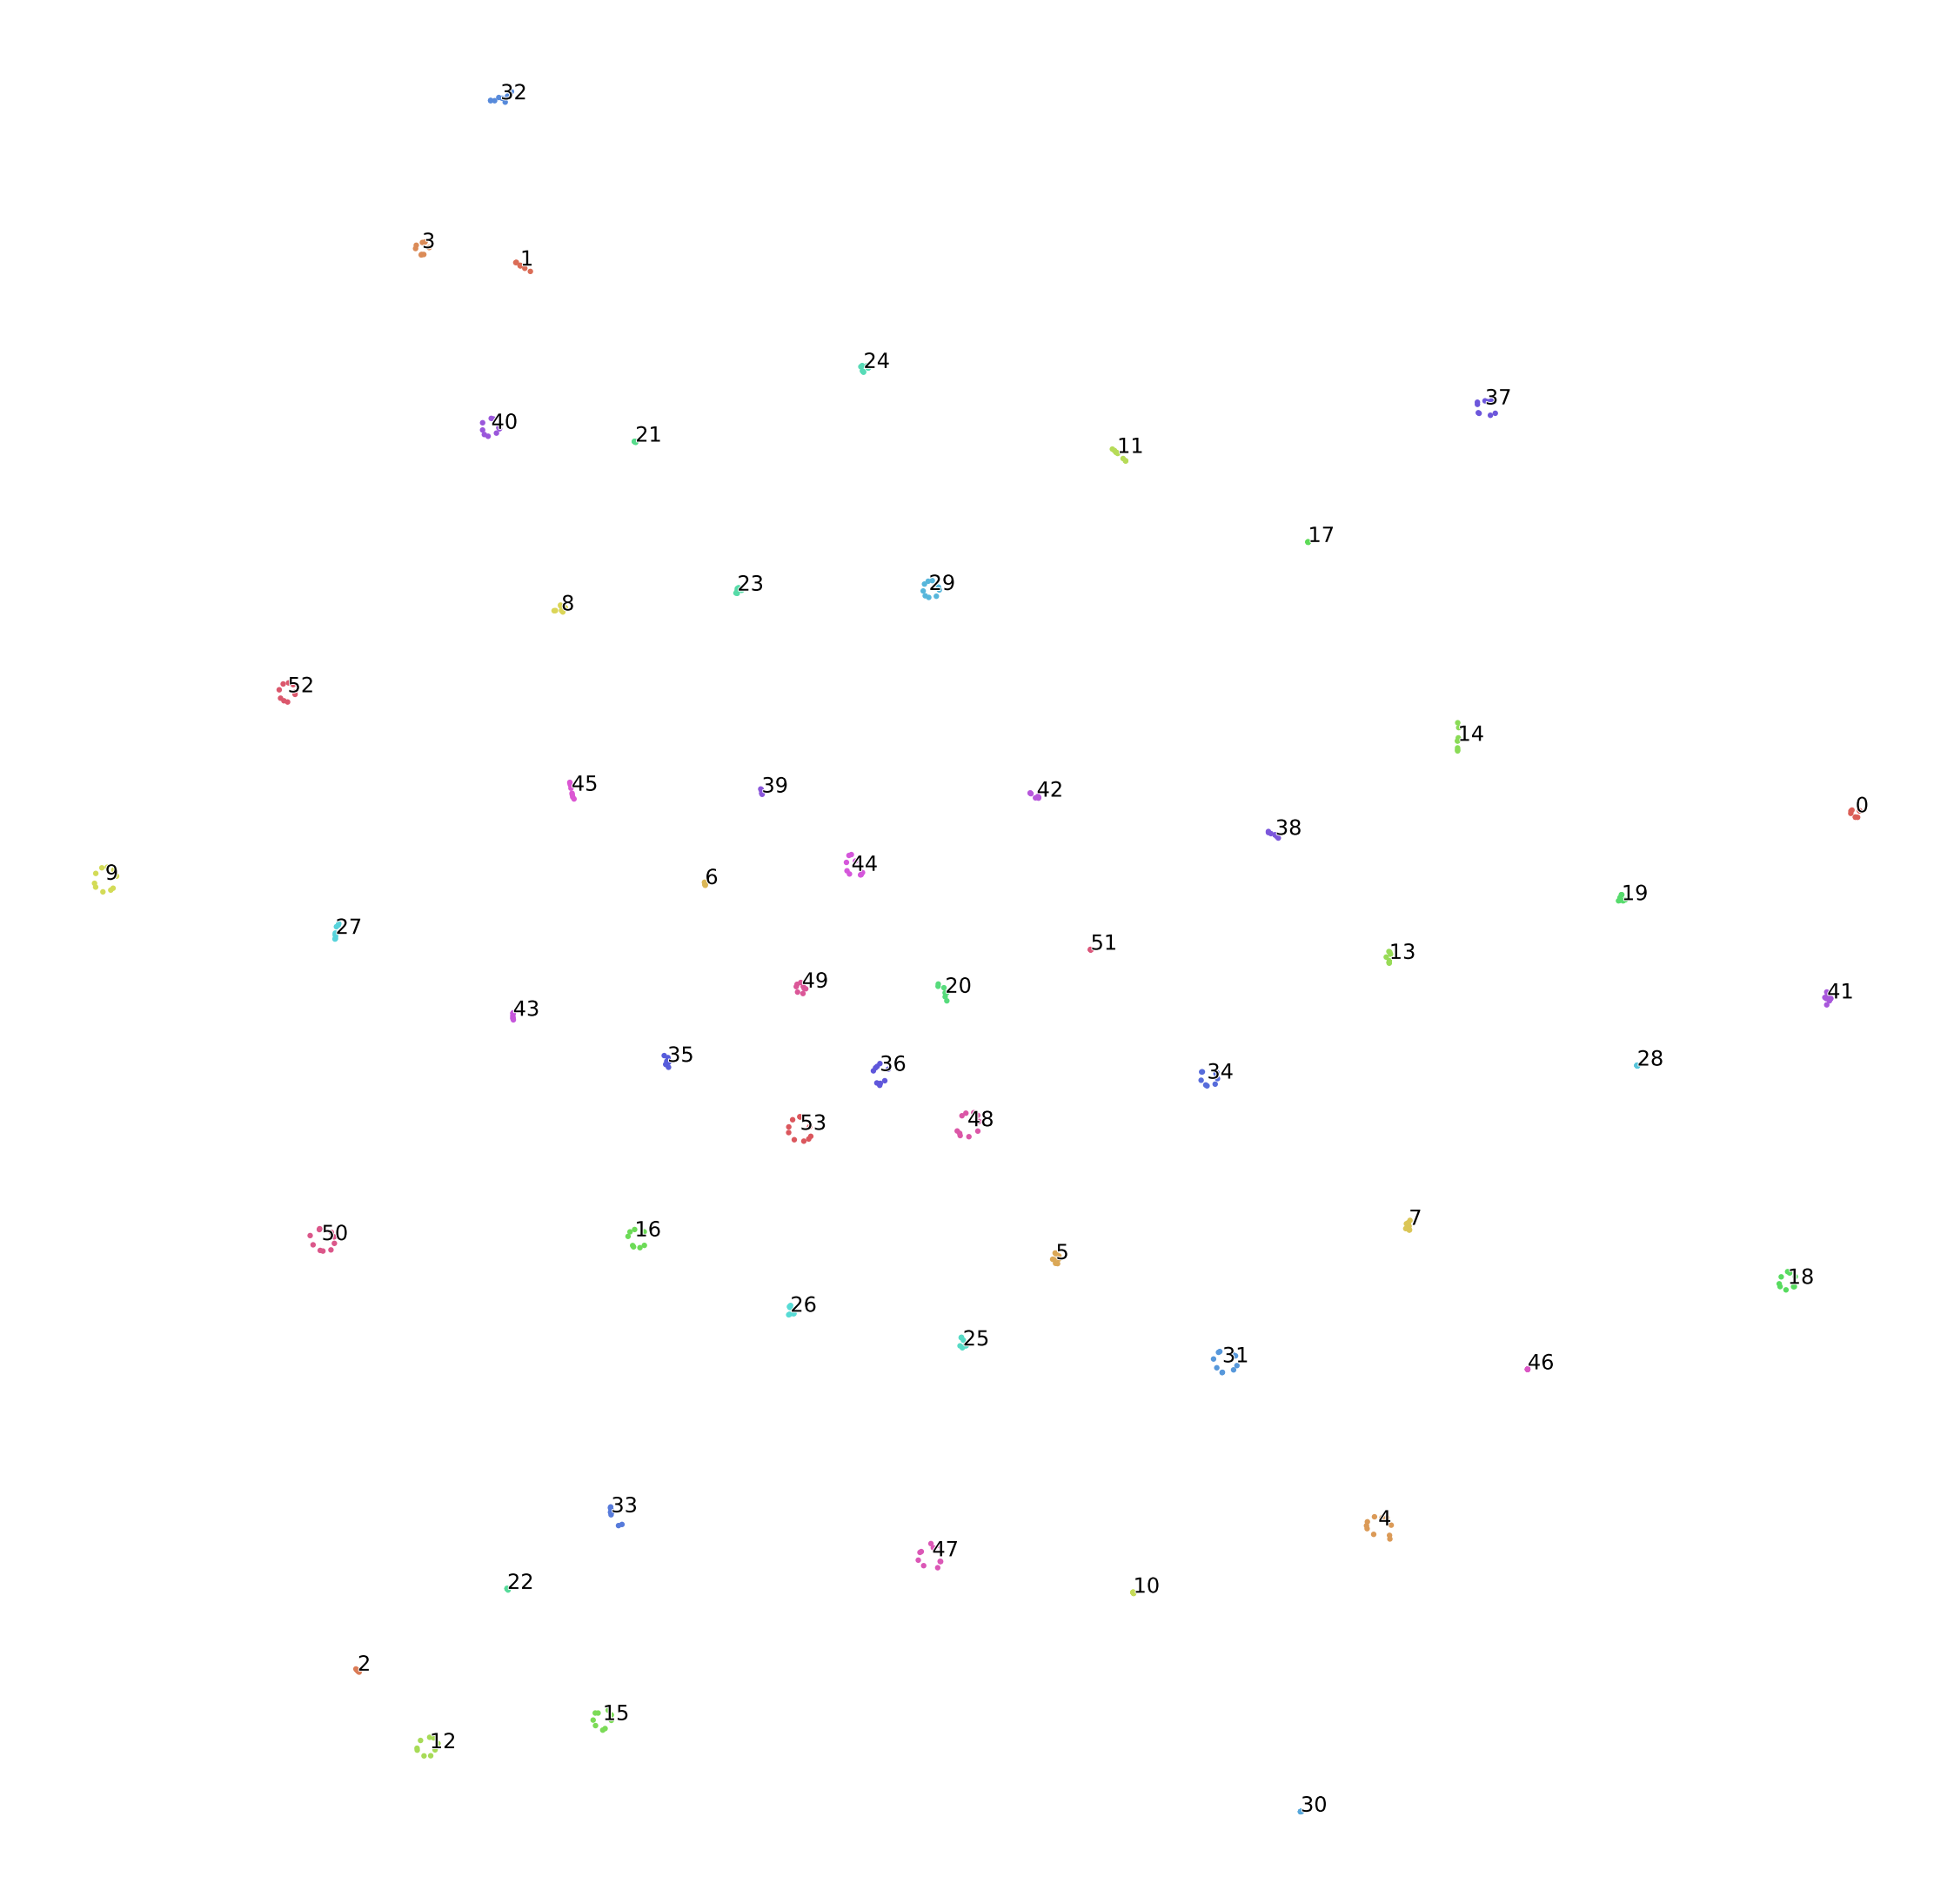

In [ ]:
import matplotlib.patheffects as PathEffects
fashion_scatter(teoae_tsne, y_train_np)

In [ ]:
#1D CNN:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
X_train=X_train.reshape(432,660,1)
X_train.shape

(432, 660, 1)

In [ ]:
X_test=X_test.reshape(108,660,1)
X_test.shape

(108, 660, 1)

In [ ]:
# Constructing the CNN model

model = Sequential()
#conv-1
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(660,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
#conv-2
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(660,1)))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
#conv-3
model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 658, 64)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 656, 64)           12352     
_________________________________________________________________
dropout (Dropout)            (None, 656, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 328, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 326, 32)           6176      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 324, 16)           1552      
_________________________________________________________________
dropout_1 (Dropout)          (None, 324, 16)          

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#obtain the flattened output
features_xtrain=model.predict(X_train) #training
features_xtrain.shape

(432, 632)

In [ ]:
features_xtest=model.predict(X_test) #testing
features_xtest.shape

(108, 632)

In [ ]:
features_xtrain_tsne = features_xtrain[0:432]
from sklearn.manifold import TSNE
import time
time_start = time.time()

teoae_tsne = TSNE(random_state=123).fit_transform(features_xtrain_tsne)

print("t-SNE done! Time elapsed: {} seconds".format(time.time()-time_start))

t-SNE done! Time elapsed: 2.7553212642669678 seconds


In [ ]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    #c=palette[colors.astype(np.int)]

    # create a scatter plot.
    f = plt.figure(figsize=(40,40))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 2880x2880 with 1 Axes>,
 [Text(11.832409, 17.616842, '0'),
  Text(-12.320455, 13.883455, '1'),
  Text(15.102237, 15.273308, '2'),
  Text(-19.559011, 12.746383, '3'),
  Text(12.282814, 14.75001, '4'),
  Text(4.0921173, -14.872154, '5'),
  Text(-3.9100666, -1.6692991, '6'),
  Text(10.064173, -21.195091, '7'),
  Text(-17.271603, 7.0818443, '8'),
  Text(14.958517, -3.1064255, '9'),
  Text(11.3012, -23.136248, '10'),
  Text(7.2119675, 15.272053, '11'),
  Text(13.50532, -22.330376, '12'),
  Text(5.558997, -18.166935, '13'),
  Text(0.99357766, -0.6431363, '14'),
  Text(18.621136, 17.749912, '15'),
  Text(4.9635725, 1.7387017, '16'),
  Text(-12.712059, 5.675014, '17'),
  Text(-8.640158, -13.735079, '18'),
  Text(-4.648775, -9.666821, '19'),
  Text(3.8594792, -5.2671003, '20'),
  Text(-12.223139, 10.89944, '21'),
  Text(14.808434, 16.96315, '22'),
  Text(-6.705279, -1.9351629, '23'),
  Text(-14.316669, 8.41275, '24'),
  Text(7.941416, -5.40818, '25'),
  Text(6.5075216, -1.8295634,

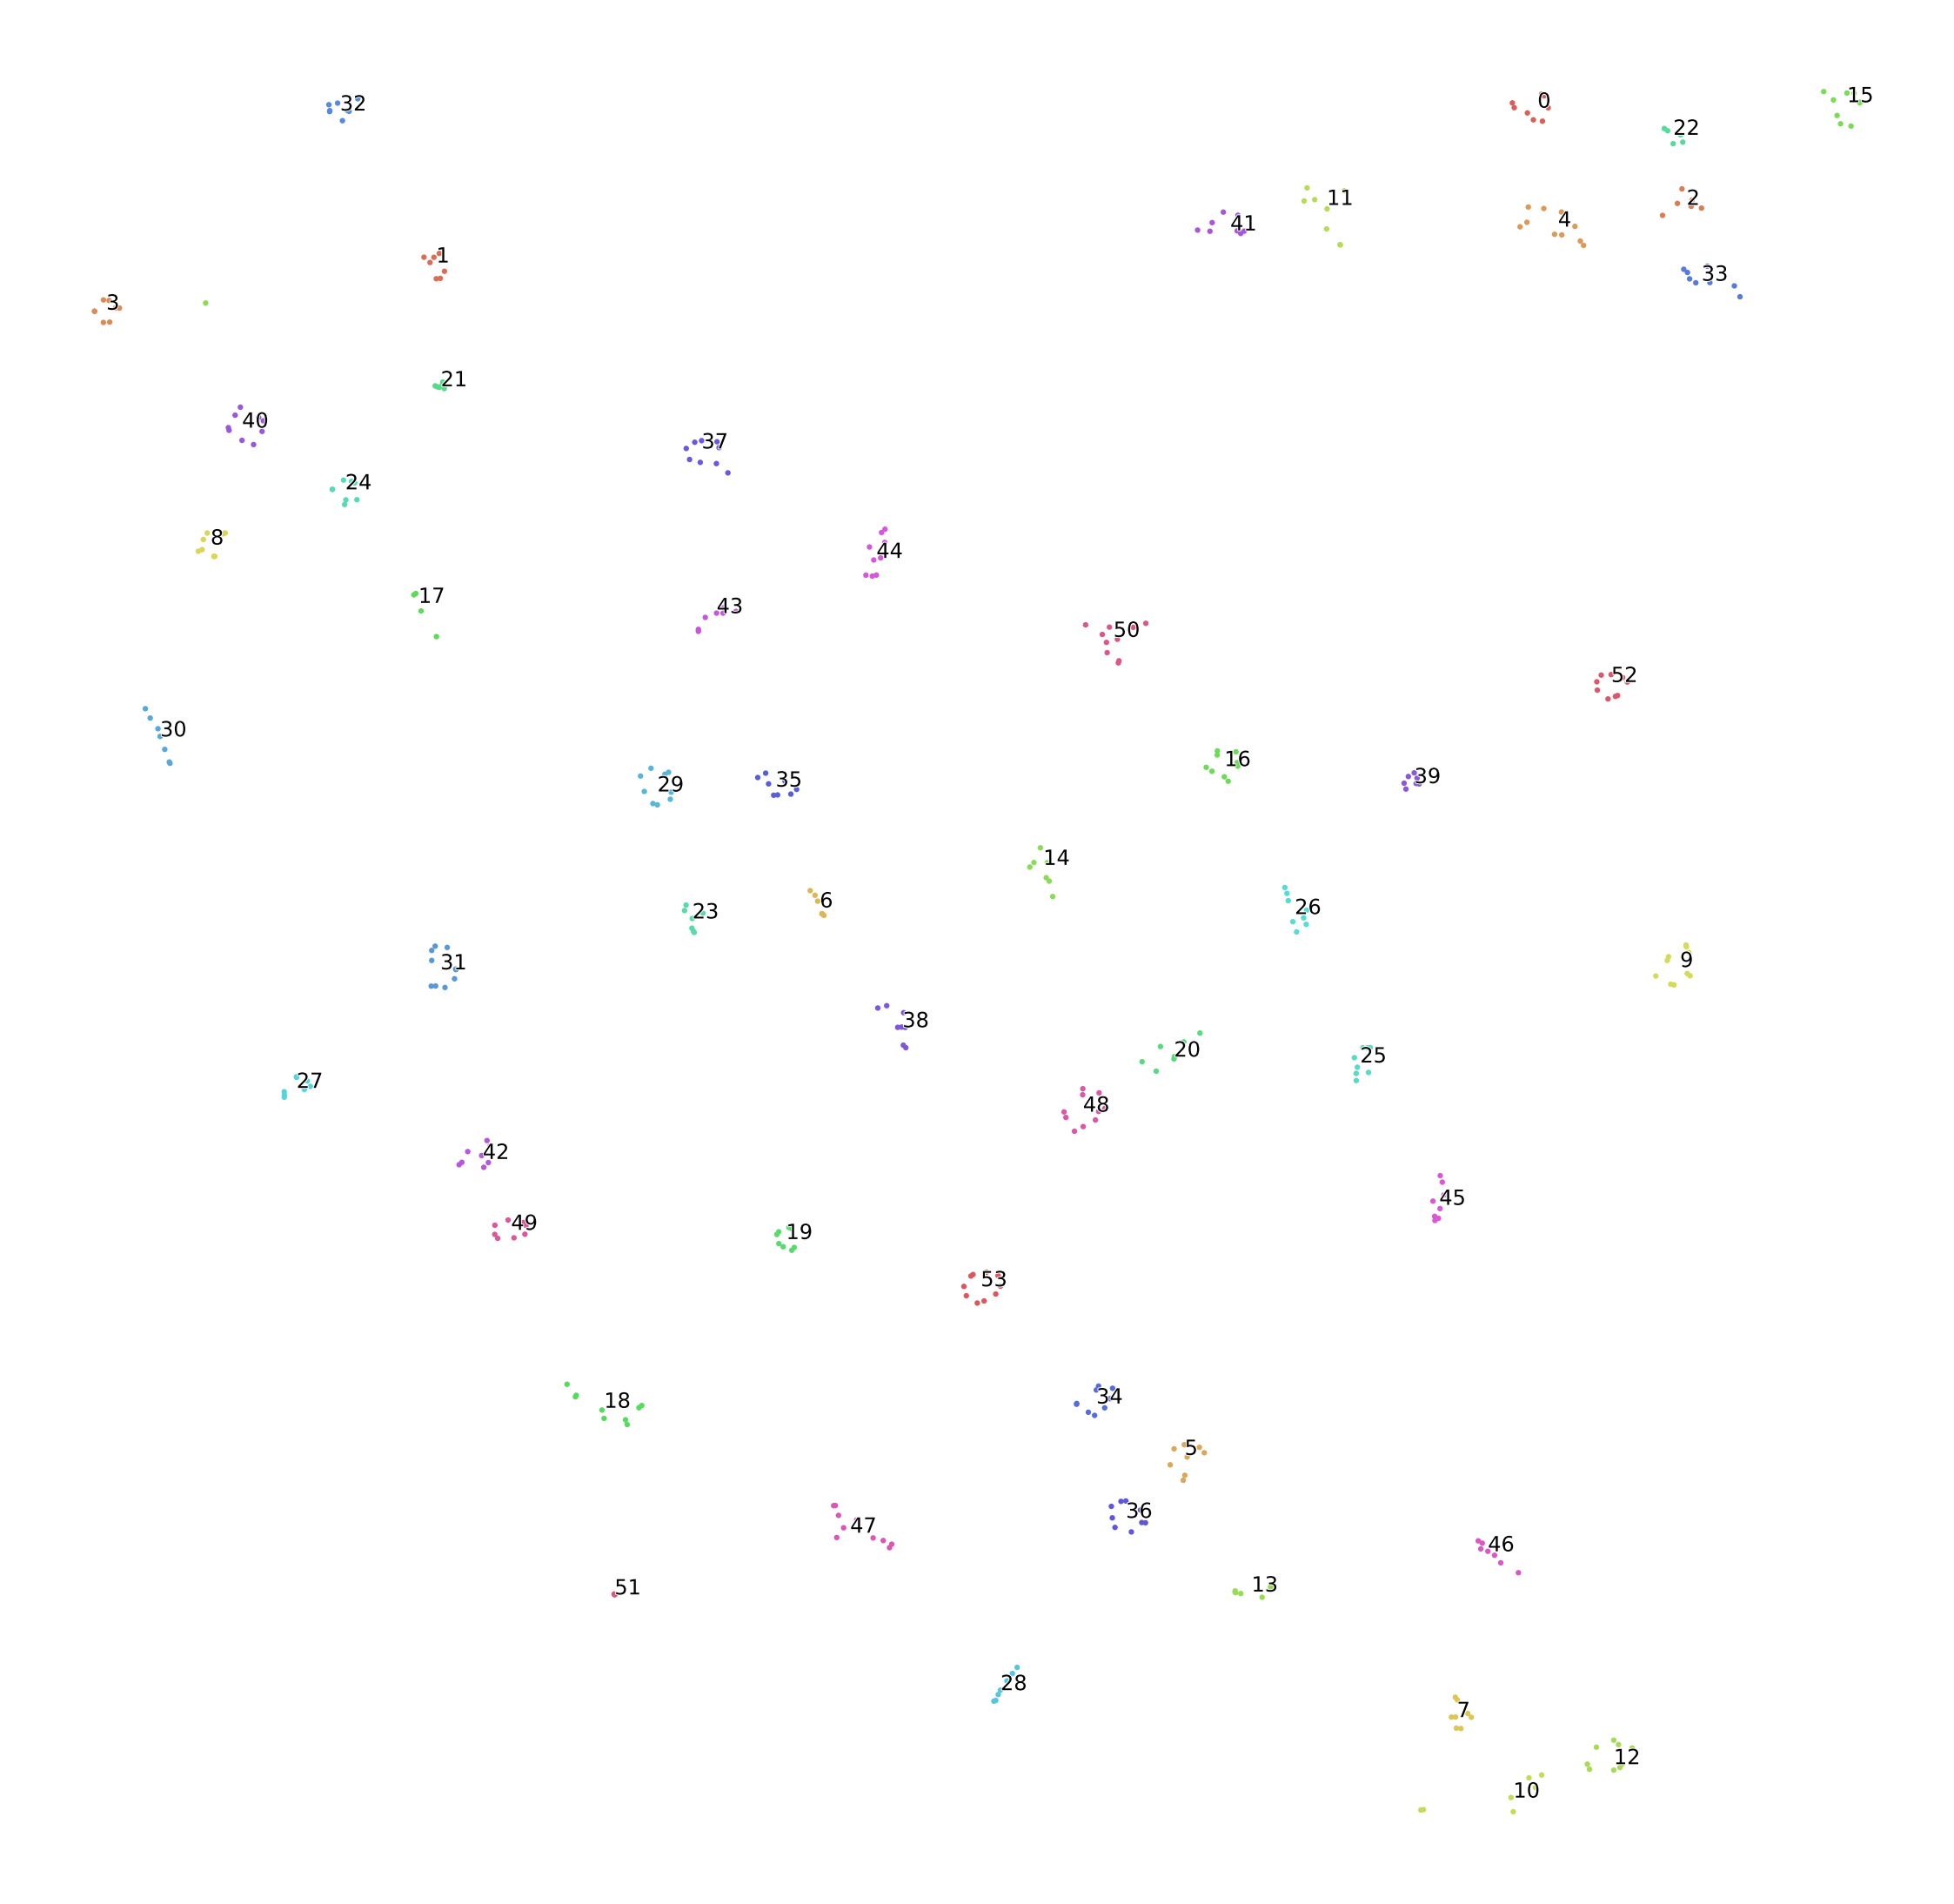

In [ ]:
import matplotlib.patheffects as PathEffects
import array
y_train_tsne=np.array([])
y_train_tsne=np.append(y_train_tsne,y_train)
y_train_tsne.shape
fashion_scatter(teoae_tsne, y_train_tsne)